In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, ShuffleSplit, LearningCurveDisplay
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

plt.style.use('default')
%matplotlib inline

In [2]:
# Загрузка матрицы признаков
feature_matrix = pd.read_csv('feature_matrix_128.csv', na_values=["?"])
total_matrix = feature_matrix.copy()

total_matrix = feature_matrix.drop(columns = ['Unnamed: 0'])
total_matrix.head()

,Ax_MAV,Ax_CD,Ax_MAX,Ax_MIN,Ax_INIT,Ax_FNL,Ay_MAV,Ay_CD,Ay_MAX,Ay_MIN,...,RF_IEMG,RF_MAV,RF_LOG,RF_WL,RF_ACC,RF_DASDV,RF_ZC,RF_WAMP,RF_MYOP,Mode
0,-0.082788,0.194516,0.098621,-0.553145,-0.548947,-0.006729,0.193257,0.105025,0.482086,0.086829,...,0.659565,0.002199,0.057953,0.369797,0.001233,0.001564,52.0,0.0,0.0,0.0
1,-0.147134,0.218421,0.104413,-0.572925,-0.035088,0.104413,0.229532,0.130144,0.504380,0.085965,...,0.584493,0.001948,0.056085,0.381330,0.001271,0.001618,64.0,0.0,0.0,0.0
2,-0.095318,0.186721,0.104413,-0.572925,0.038609,-0.461041,0.214915,0.111148,0.504380,0.085965,...,0.543723,0.001812,0.054427,0.403360,0.001345,0.001724,74.0,0.0,0.0,0.0
3,-0.072635,0.191764,0.104413,-0.585118,-0.343078,-0.001161,0.194778,0.117547,0.532462,0.081685,...,0.564877,0.001883,0.055629,0.378346,0.001261,0.001626,59.0,0.0,0.0,0.0
4,-0.164038,0.216013,0.100683,-0.585118,-0.002821,-0.013294,0.248497,0.134200,0.532462,0.075260,...,0.543924,0.001813,0.054203,0.387581,0.001292,0.001632,61.0,0.0,0.0,0.0


In [3]:
x_raw = total_matrix.copy()
y = x_raw['Mode']
x_raw = x_raw.copy().drop(columns=['Mode'])
rus = RandomUnderSampler()
x_raw, y = rus.fit_resample(x_raw, y)
print(x_raw[y==0].shape)
print(x_raw[y==1].shape)

(3585, 92)
(3585, 92)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)

In [5]:
normalizer1 = preprocessing.StandardScaler()
X_train = pd.DataFrame(normalizer1.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(normalizer1.fit_transform(X_test), columns=X_test.columns)

In [6]:
clf_svm = svm.SVC(kernel = "rbf", C=10, gamma=0.1)
clf_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = clf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8830444311615859


In [8]:
target_names = ['Sitting', 'Level ground walking', 'Ramp ascent', 'Ramp descent', 'Stair ascent', 'Stair descent', 'Standing']
print(classification_report(y_test, y_pred, digits = 3))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0      0.948     0.871     0.908       731
         1.0      0.648     0.806     0.718       713
         2.0      0.955     0.894     0.923       707
         3.0      0.947     0.879     0.912       727
         4.0      0.942     0.969     0.955       702
         5.0      0.931     0.953     0.942       726
         6.0      0.878     0.809     0.842       713

    accuracy                          0.883      5019
   macro avg      0.893     0.883     0.886      5019
weighted avg      0.893     0.883     0.886      5019



[Text(0, 0.5, 'Сидение'),
 Text(0, 1.5, 'Ходьба по ровной поверхности'),
 Text(0, 2.5, 'Подъем по рампе'),
 Text(0, 3.5, 'Спуск по рампе'),
 Text(0, 4.5, 'Подъем по лестнице'),
 Text(0, 5.5, 'Спуск по лестнице'),
 Text(0, 6.5, 'Стояние')]

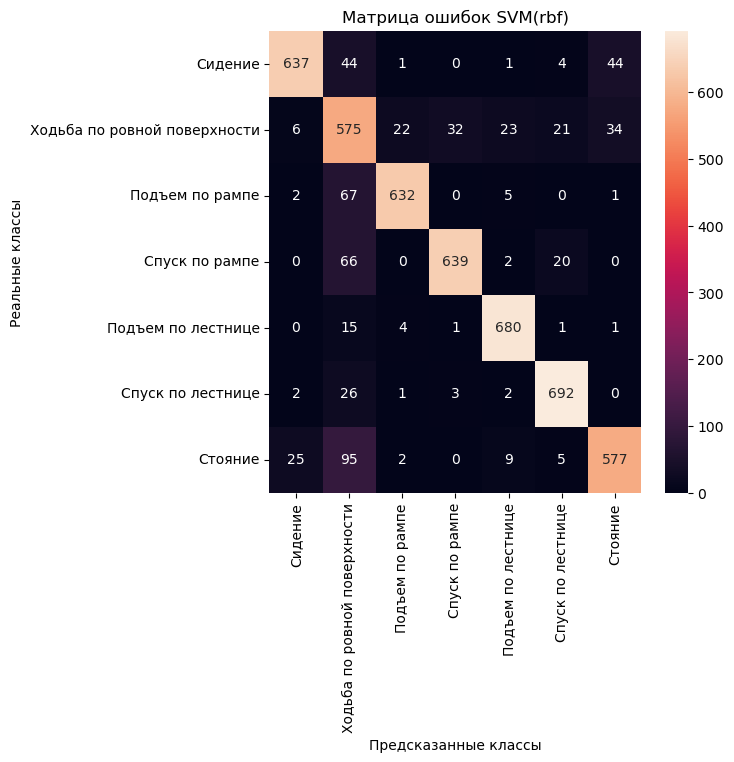

In [11]:
classes = ['Сидение', 'Ходьба по ровной поверхности', 'Подъем по рампе', 'Спуск по рампе', 'Подъем по лестнице', 'Спуск по лестнице', 'Стояние']
fig, ax = plt.subplots(figsize=(6,6))  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d")
# labels, title and ticks
ax.set_xlabel('Предсказанные классы')
ax.set_ylabel('Реальные классы') 
ax.set_title('Матрица ошибок SVM(rbf)') 
ax.xaxis.set_ticklabels(classes,rotation=90)
ax.yaxis.set_ticklabels(classes,rotation=0)

In [20]:
c = list([1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3])
gammas = list([0.1, 1, 10, 100])
param_grid = dict(C=c, gamma=gammas)
grid = GridSearchCV(clf_svm, param_grid, cv=10, n_jobs=10, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 10, 'gamma': 0.1}


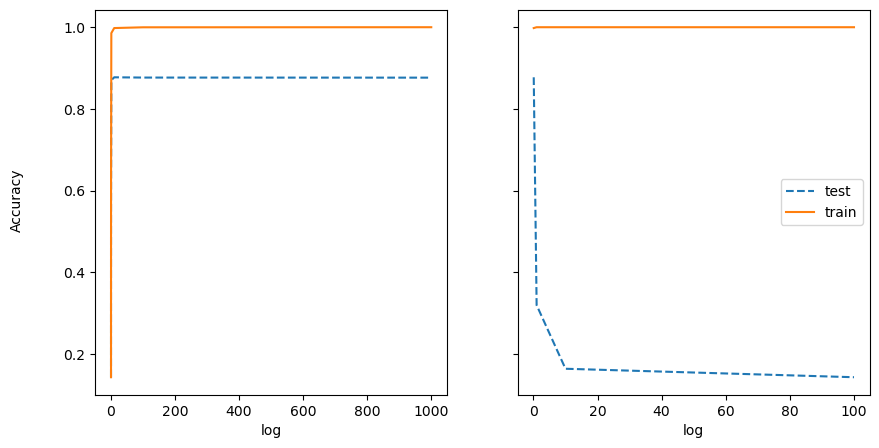

In [21]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(10,5))
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].plot(x, y_1, linestyle='--', label='test')
        ax[i].plot(x, y_2, linestyle='-',label='train' )
        ax[i].set_xlabel(p.upper())
        ax[i].set_xlabel("log")

    plt.legend()
    plt.show()

plot_search_results(grid)

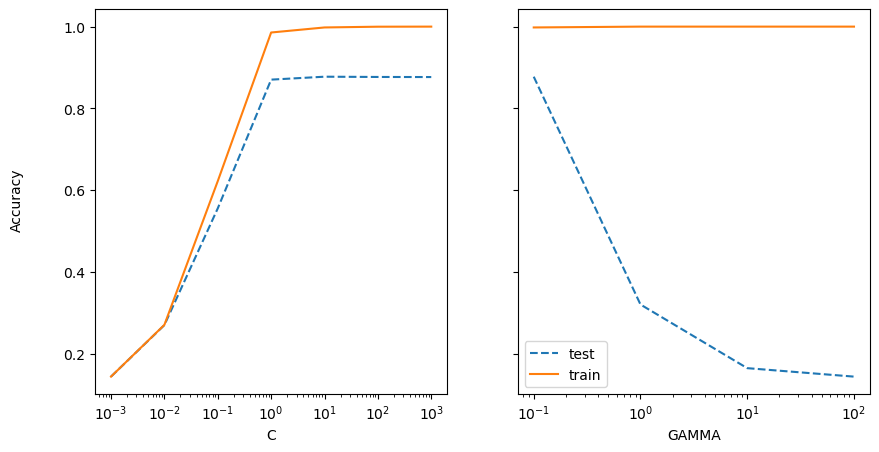

In [22]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(10,5))
    plt.xscale("log")
    fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        #e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        #e_2 = np.array(stds_train[best_index])
        plt.xscale("log")
        ax[i].plot(x, y_1,linestyle='--', label='test')
        plt.xscale("log")
        ax[i].plot(x, y_2,linestyle='-',label='train' )
        plt.xscale("log")
        ax[i].set_xlabel(p.upper())
        ax[i].set_xscale("log")

    plt.legend()
    plt.show()

plot_search_results(grid)